.. _rendering:

## Rendering

Of course, any plotting library needs a way to render figures for display, and Toyplot is no exception.  To integrate Toyplot into your workflow as easily as possible, we provide four different rendering mechanisms:

.. _backends:

### Backends

At the lowest level, Toyplot provides a large collection of rendering `backends`.  Each backend knows how to render a Toyplot canvas to a specific file format, and can typically render the canvas directly to disk, to a buffer you provide, or return the raw representation of the canvas for further processing.  You choose a backend that provides the file format you want to generate, and use it to explicitly render your canvas.  For example, you could use the :mod:`toyplot.pdf` backend to save a figure as a vector PDF image on disk:

```python
import toyplot.pdf
toyplot.pdf.render(canvas, "figure1.pdf")
```

Similarly, you could substitute the :mod:`toyplot.png` backend to save a PNG bitmap image:

```python
import toyplot.png
toyplot.png.render(canvas, "figure1.png")
```

You could do the same with the :mod:`toyplot.svg` backend, but suppose you wanted to add a custom CSS class to the SVG markup for inclusion in a publishing workflow.  To accomodate this, the SVG backend can return a DOM for further editing, instead of saving it directly to disk:

```python
import toyplot.svg
svg = toyplot.svg.render(canvas)
svg.attrib["class"] = "MyCustomClass"
import xml.etree.ElementTree as xml
with open("figure1.svg", "wb") as file:
    file.write(xml.tostring(svg))
```

Finally, there is Toyplot's most important backend, :mod:`toyplot.html` which produces the preferred interactive HTML representation of a canvas.  Like the other backends, you can use it to write directly to disk, or return a DOM object for editing as-needed:

```python
import toyplot.html
toyplot.html.render(canvas, "figure1.html")
```

Note that the file produced by this backend is a completely self-contained HTML fragment that could be emailed directly to a colleague, inserted into a larger HTML document, etc.

### Displays

While backends are useful when you wish to save a canvas to disk for incorporation into a paper or some larger workflow, in many cases you may find yourself simply wanting to display the results of some computation.  Writing files to disk and opening them in a separate application can be time-consuming and frustrating, particularly when running a script repeatedly during development.  For this case, Toyplot provides `display` modules, which provide convenient ways to display figures interactively.  The most portable of these modules is :mod:`toyplot.browser`:

```python
import toyplot.browser
toyplot.browser.show(canvas)
```

This will open a new browser window containing your figure, with all of Toyplot's interaction and features intact.

### Rich Display

For integration with Jupyter user interfaces such as [Notebooks](https://jupyter-notebook.readthedocs.io/en/stable/) and [Qt Consoles](https://qtconsole.readthedocs.io/en/stable/), the Toyplot canvas object provides rich display representations that can render it into a cell.  For example, suppose you created a canvas using a Qt console:

```python
In [1]: import numpy
   ...: import toyplot
   ...: x = numpy.linspace(0, 1)
   ...: y = x ** 2
   ...: canvas = toyplot.Canvas(width=300)
   ...: axes = canvas.cartesian()
   ...: mark = axes.plot(x, y)
```

To display the canvas, simply use it as the result of an expression:

```python
In [2]: canvas
Out[2]:
```
<img src="qtconsole-embedding.png"/>

In the case of the Qt console, the figure is rendered as a PNG image and embedded in the cell output.

### Autorendering

As a special case for interactive environments such as Jupyter notebooks, Toyplot's *autorender* feature automatically renders a canvas into a notebook cell using Toyplot's preferred interactive HTML representation.  We use autorendering with few exceptions throughout this documentation.  As an example, try running the same code from the previous example in a Jupyter notebook:

In [1]:
import numpy
import toyplot
x = numpy.linspace(0, 1)
y = x ** 2
canvas = toyplot.Canvas(width=300)
axes = canvas.cartesian()
mark = axes.plot(x, y);

<svg class="toyplot-canvas-Canvas" height="300.0px" id="t8bce34c396e54eae967d4be138213c71" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 300.0 300.0" width="300.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> <path d="M 50.0 250.0 L 54.08163265306122 249.9167013744273 L 58.16326530612244 249.66680549770928 L 62.244897959183675 249.2503123698459 L 66.32653061224491 248.66722199083716 L 70.40816326530611 247.91753436068305 L 74.48979591836735 247.0012494793836 L 78.57142857142858 245.91836734693877 L 82.65306122448979 244.6688879633486 L 86.73469387755102 243.25281132861306 L 90.81632653061223 241.6701374427322 L 94.89795918367346 239.92086630570594 L 98.9795918367347 238.00499791753435 L 103.06122448979592 235.92253227821743 L 107.14285714285714 233.67346938775512 L 111.22448979591837 231.25780924614745 L 115.3061224489796 228.67555185339444 L 119.38775510204081 225.92669720949604 L 123.46938775510203 223.0112453144523 L 127.55102040816327 219.92919616826322 L 131.6326530612245 216.6805497709288 L 135.71428571428572 213.26530612244898 L 139.79591836734693 209.68346522282383 L 143.87755102040816 205.93502707205332 L 147.9591836734694 202.01999167013744 L 152.0408163265306 197.9383590170762 L 156.12244897959184 193.69012911286964 L 160.20408163265307 189.2753019575177 L 164.28571428571428 184.69387755102045 L 168.3673469387755 179.94585589337777 L 172.44897959183672 175.03123698458978 L 176.53061224489795 169.9500208246564 L 180.6122448979592 164.7022074135777 L 184.69387755102042 159.2877967513536 L 188.77551020408163 153.70678883798416 L 192.85714285714283 147.9591836734694 L 196.93877551020407 142.04498125780927 L 201.0204081632653 135.96418159100375 L 205.10204081632654 129.7167846730529 L 209.18367346938774 123.30279050395671 L 213.26530612244898 116.72219908371514 L 217.34693877551018 109.97501041232822 L 221.42857142857142 103.06122448979593 L 225.51020408163265 95.9808413161183 L 229.59183673469386 88.73386089129534 L 233.6734693877551 81.32028321532698 L 237.75510204081633 73.74010828821326 L 241.83673469387753 65.99333610995419 L 245.91836734693877 58.079966680549774 L 250.0 50.0" style="stroke:rgb(40%,76.1%,64.7%);stroke-opacity:1.0;stroke-width:2.0"> 0.0 0.5 1.0 0.0 0.5 1.0

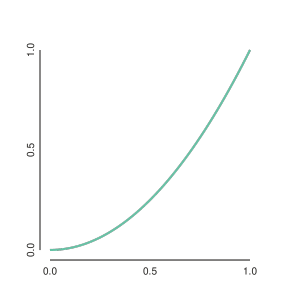

In [2]:
canvas

Now there are two copies of the figure!  What happened is that `autorendering` automatically rendered the figure in the first cell, and then rich display worked as normal in the second cell.  So, when using Toyplot in a notebook, you can leave out the second step.  Note that no special import statements, magics, backends, or configuration is required - Toyplot Just Works.  In this case, autorendering is enabled by default when you create a new canvas.  Toyplot knows that it's being run in the Jupyter notebook environment, and when you execute a notebook cell that contains a canvas with autorendering enabled, it inserts the rendered canvas in the cell output.  Note that this is not the same as the rich display system - a Toyplot canvas doesn't have to be the result of an expression to be rendered, and you can create multiple Toyplot canvases in a single notebook cell (handy when producing multiple figures in a loop), and they will all be rendered.

Autorendering for a canvas is automatically disabled if you pass it to a rendering backend or a display.  So while the above example automatically rendered the canvas into a notebook cell, the following will not:

```python
canvas = toyplot.Canvas(width=300)
canvas.axes().plot(x, y)
toyplot.pdf.render(canvas, "figure2.pdf")
```

In some circumstances you may want to disable autorendering yourself, which you can do when the canvas is created:

In [3]:
canvas = toyplot.Canvas(width=300, autorender=False)
canvas.cartesian().plot(x, y);